<a href="https://colab.research.google.com/github/sanket-ghodake/handwritten-character-recognition/blob/main/colab_notebooks/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# https://stackoverflow.com/questions/65099766/is-there-a-way-to-download-data-from-a-public-link-to-google-colab 
!gdown --id 1HbJJngCeOTRgMbGhG9n6SWbhzmP6lfrR # https://drive.google.com/file/d/1HbJJngCeOTRgMbGhG9n6SWbhzmP6lfrR/view?usp=sharing
!gdown --id 1TN3eAamX3YdpaNkPBzgy4bWy-Prqrs_3 # https://drive.google.com/file/d/1TN3eAamX3YdpaNkPBzgy4bWy-Prqrs_3/view?usp=sharing
!gdown --id 1Z26fsynq5gtu6YkjZdTvM1twJFW9-RBx # https://drive.google.com/file/d/1Z26fsynq5gtu6YkjZdTvM1twJFW9-RBx/view?usp=sharing

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1HbJJngCeOTRgMbGhG9n6SWbhzmP6lfrR
To: /content/segmentation line.jpeg
100% 3.19k/3.19k [00:00<00:00, 4.69MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1TN3eAamX3YdpaNkPBzgy4bWy-Prqrs_3
To: /content/segmentation page.jpeg
100% 62.0k/62.0k [00:00<00:00, 58.9MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Do

# Page segmentation into lines 

## Method 1 - use same technique of Method 1 line segmentaion with some changes 

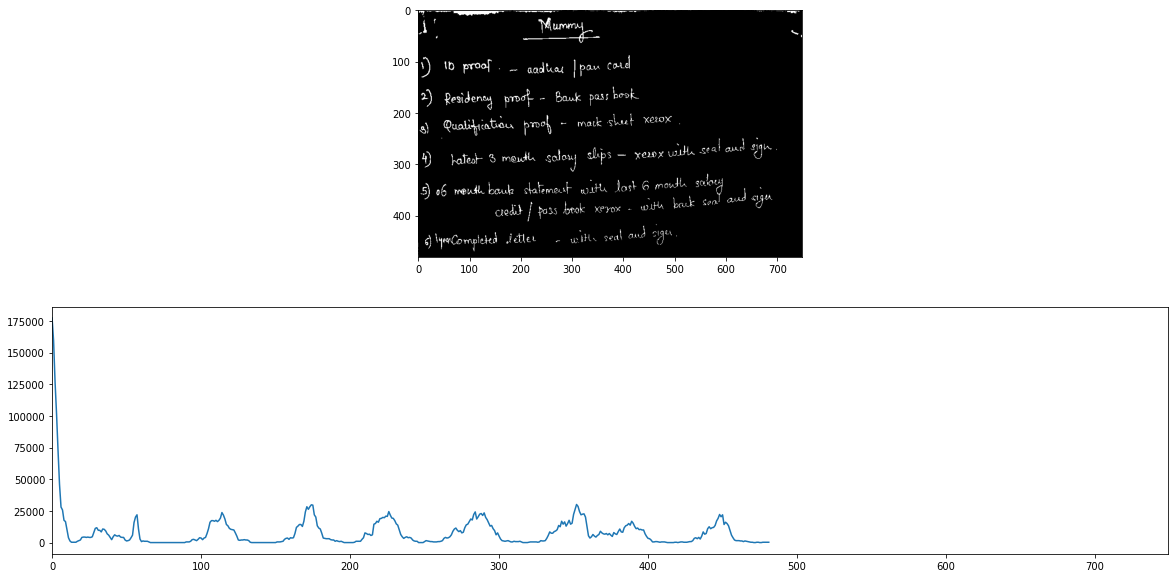

In [ ]:
from skimage.filters import threshold_otsu

first_line =  cv2.imread('/content/segmentation page.jpeg',0)
# first_line = img1.copy()
# first_line =cv2.rotate(first_line, cv2.ROTATE_90_CLOCKWISE)


first_line = 255 -first_line
# thresh = threshold_otsu(first_line)
# binary = first_line > thresh
binary = np.where(255-first_line >= 100, 0, 255)
# print(thresh)

# find the vertical projection by adding up the values of all pixels along rows
vertical_projection = np.sum(binary, axis=1)

# plot the vertical projects
fig, ax = plt.subplots(nrows=2, figsize=(20,10))
plt.xlim(0, first_line.shape[1])
ax[0].imshow(binary, cmap="gray")
ax[1].plot(vertical_projection)

whitespaces: [24, 17, 7, 4, 4, 5, 1, 2, 2]
average whitespace lenght: 7.333333333333333


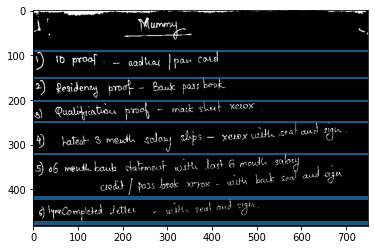

In [ ]:
# height = first_line.shape[1]
# height = max(vertical_projection*0.9)

## we will go through the vertical projections and 
## find the sequence of consecutive white spaces in the image
whitespace_lengths = []
whitespace = 0
index = 0
index_=[]
for vp in vertical_projection:
    
    if vp <= 0:
        whitespace = whitespace + 1
    else:
        if whitespace != 0:
            whitespace_lengths.append(whitespace)
            index_.append(index)
        whitespace = 0 # reset whitepsace counter. 
    index+=1
print("whitespaces:", whitespace_lengths)
avg_white_space_length = np.mean(whitespace_lengths)
print("average whitespace lenght:", avg_white_space_length)

plt.imshow(binary,cmap='gray')
for xc in index_:
    plt.axhline(y=xc)

[78, 143, 200, 248, 318, 416, 421, 472, 476, 475]


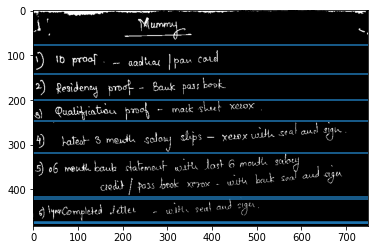

In [ ]:
## find index of whitespaces which are actually long spaces using the avg_white_space_length
whitespace_length = 0
divider_indexes = []
for index, vp in enumerate(vertical_projection):
    if vp <= 0:
        whitespace_length = whitespace_length + 1
    else:
        if whitespace_length != 0 or whitespace_length > (avg_white_space_length):#change here
            divider_indexes.append(index-int(whitespace_length/2))
            whitespace_length = 0 # reset it
          


for index, vp in reversed(list(enumerate(vertical_projection))):# for last word segmentation
    if vp <=0:
        whitespace_length = whitespace_length + 1
    else:
        if whitespace_length != 0 or whitespace_length > (avg_white_space_length):
            divider_indexes.append(index+int(whitespace_length/2))
            break
            whitespace_length = 0 # reset it
  
print(divider_indexes)

plt.imshow(binary,cmap='gray')
for xc in divider_indexes:
    plt.axhline(y=xc)

# Line segmentation into words 

## Method 1

https://nbviewer.org/github/muthuspark/line-segmentation-handwritten-doc/blob/master/A%2A%20Path%20Planning%20Line%20Segmentation%20Algorithm.ipynb#now-that-I-have-the-lines,-I-can-now-divide-these-lines-into-words. 


https://muthu.co/segmenting-lines-in-handwritten-documents-using-a-path-planning-algorithm/


Working but we have to decide ('change here') value in below code 

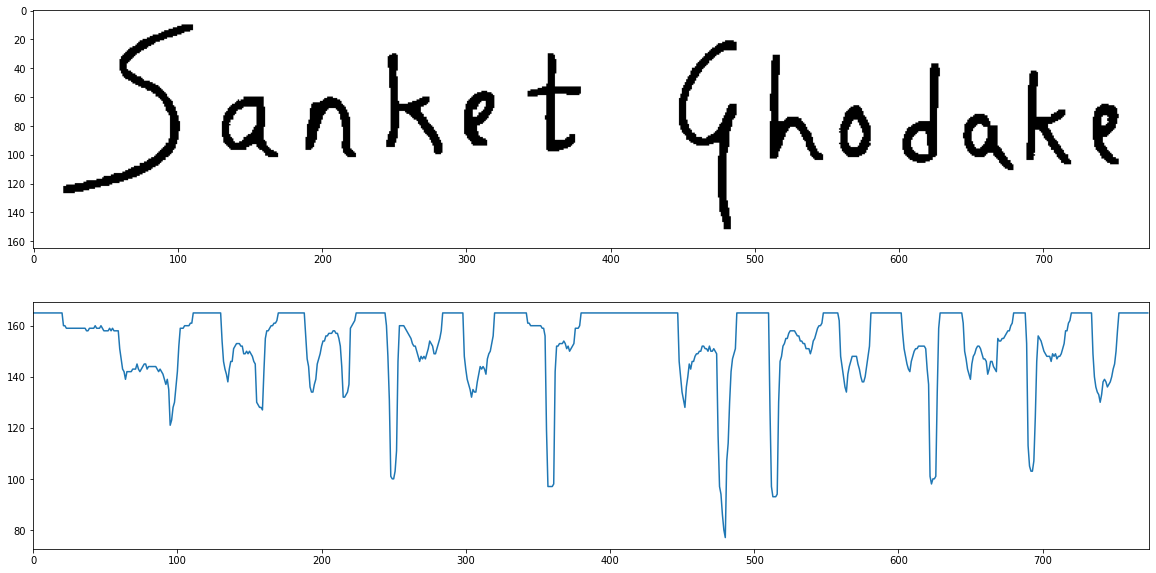

In [ ]:
from skimage.filters import threshold_otsu

#binarize the image, guassian blur will remove any noise in the image
first_line =  cv2.imread('/content/Screenshot 2022-06-01 135936.jpg',0)
# first_line = 255 -first_line
thresh = threshold_otsu(first_line)
binary = first_line > thresh

# find the vertical projection by adding up the values of all pixels along rows
vertical_projection = np.sum(binary, axis=0)

# plot the vertical projects
fig, ax = plt.subplots(nrows=2, figsize=(20,10))
plt.xlim(0, first_line.shape[1])
ax[0].imshow(binary, cmap="gray")
ax[1].plot(vertical_projection)

whitespaces: [21, 20, 19, 21, 15, 23, 68, 23, 11, 22, 16, 9, 15]
average whitespace lenght: 21.76923076923077


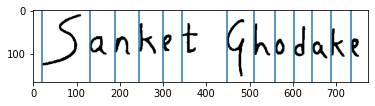

In [ ]:
height = first_line.shape[0]

## we will go through the vertical projections and 
## find the sequence of consecutive white spaces in the image
whitespace_lengths = []
whitespace = 0
index = 0
index_=[]
for vp in vertical_projection:
    
    if vp == height:
        whitespace = whitespace + 1
    elif vp != height:
        if whitespace != 0:
            whitespace_lengths.append(whitespace)
            index_.append(index)
        whitespace = 0 # reset whitepsace counter. 
    index+=1
print("whitespaces:", whitespace_lengths)
avg_white_space_length = np.mean(whitespace_lengths)
print("average whitespace lenght:", avg_white_space_length)

plt.imshow(binary,cmap='gray')
for xc in index_:
    plt.axvline(x=xc)

[159, 314, 414, 575]


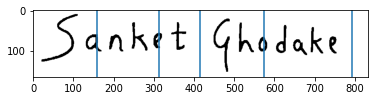

In [ ]:
## find index of whitespaces which are actually long spaces using the avg_white_space_length
whitespace_length = 0
divider_indexes = []
for index, vp in enumerate(vertical_projection):
    if vp == height:
        whitespace_length = whitespace_length + 1
    elif vp != height:
        if whitespace_length != 0 and whitespace_length > (avg_white_space_length+30):#change here
            divider_indexes.append(index-int(whitespace_length/2))
            whitespace_length = 0 # reset it
          
print(divider_indexes)

for index, vp in reversed(list(enumerate(vertical_projection))):# for last word segmentation
    if vp == height:
        whitespace_length = whitespace_length + 1
    elif vp != height:
        if whitespace_length != 0 and whitespace_length > (avg_white_space_length):
            divider_indexes.append(index+int(whitespace_length/2))
            break
            whitespace_length = 0 # reset it
  

plt.imshow(binary,cmap='gray')
for xc in divider_indexes:
    plt.axvline(x=xc)

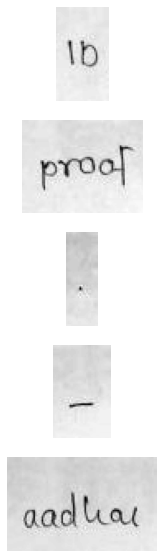

In [ ]:
# lets create the block of words from divider_indexes
divider_indexes = np.array(divider_indexes)
dividers = np.column_stack((divider_indexes[:-1],divider_indexes[1:]))

fig, ax = plt.subplots(nrows=len(dividers), figsize=(5,10))
for index, window in enumerate(dividers):
    ax[index].axis("off")
    ax[index].imshow(first_line[:,window[0]:window[1]], cmap="gray")

# Word Segmentation into characters

## Method 1 - use same technique of Method 1 line segmentaion with some changes 

87


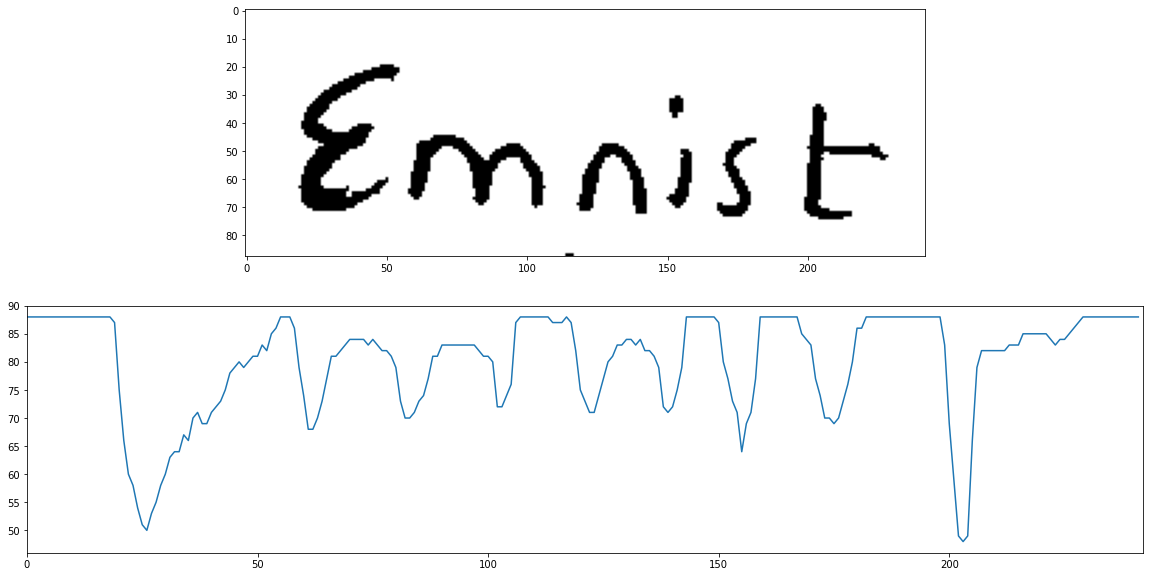

In [ ]:
from skimage.filters import threshold_otsu

#binarize the image, guassian blur will remove any noise in the image
first_line =  cv2.imread('/content/segmentation word.jpeg',0)

# first_line = 255 -first_line
thresh = threshold_otsu(first_line)
binary = first_line > thresh
print(thresh)

# find the vertical projection by adding up the values of all pixels along rows
vertical_projection = np.sum(binary, axis=0)

# plot the vertical projects
fig, ax = plt.subplots(nrows=2, figsize=(20,10))
plt.xlim(0, first_line.shape[1])
ax[0].imshow(binary, cmap="gray")
ax[1].plot(vertical_projection)

whitespaces: [19, 3, 7, 1, 7, 9, 17]
average whitespace lenght: 9.0


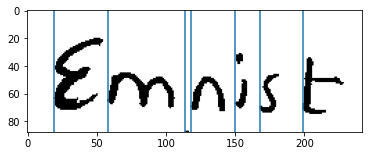

In [ ]:
height = first_line.shape[0]

## we will go through the vertical projections and 
## find the sequence of consecutive white spaces in the image
whitespace_lengths = []
whitespace = 0
index = 0
index_=[]
for vp in vertical_projection:
    
    if vp == height:
        whitespace = whitespace + 1
    elif vp != height:
        if whitespace != 0:
            whitespace_lengths.append(whitespace)
            index_.append(index)
        whitespace = 0 # reset whitepsace counter. 
    index+=1
print("whitespaces:", whitespace_lengths)
avg_white_space_length = np.mean(whitespace_lengths)
print("average whitespace lenght:", avg_white_space_length)

plt.imshow(binary,cmap='gray')
for xc in index_:
    plt.axvline(x=xc)

[10, 57, 111, 118, 147, 164, 191, 241]


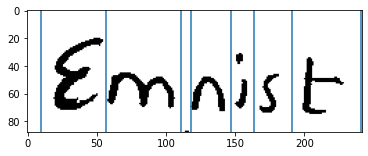

In [ ]:
## find index of whitespaces which are actually long spaces using the avg_white_space_length
whitespace_length = 0
divider_indexes = []
for index, vp in enumerate(vertical_projection):
    if vp == height:
        whitespace_length = whitespace_length + 1
    elif vp != height:
        if whitespace_length != 0 or whitespace_length > (avg_white_space_length):#change here
            divider_indexes.append(index-int(whitespace_length/2))
            whitespace_length = 0 # reset it
          


for index, vp in reversed(list(enumerate(vertical_projection))):# for last word segmentation
    if vp == height:
        whitespace_length = whitespace_length + 1
    elif vp != height:
        if whitespace_length != 0 or whitespace_length > (avg_white_space_length):
            divider_indexes.append(index+int(whitespace_length/2))
            break
            whitespace_length = 0 # reset it
  
print(divider_indexes)

plt.imshow(binary,cmap='gray')
for xc in divider_indexes:
    plt.axvline(x=xc)

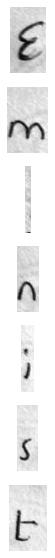

In [ ]:
# lets create the block of words from divider_indexes
divider_indexes = np.array(divider_indexes)
dividers = np.column_stack((divider_indexes[:-1],divider_indexes[1:]))
fig, ax = plt.subplots(nrows=len(dividers), figsize=(5,10))
for index, window in enumerate(dividers):
    ax[index].axis("off")
    ax[index].imshow(first_line[:,window[0]:window[1]], cmap="gray")
    


In [ ]:

fig, ax = plt.subplots(nrows=len(dividers), figsize=(5,10))
for index, window in enumerate(dividers):
  data = ax[index]
  cv2.imwrite()q
    ax[index].axis("off")
    ax[index].imshow(first_line[:,window[0]:window[1]], cmap="gray")